measured is blue
simulated is red


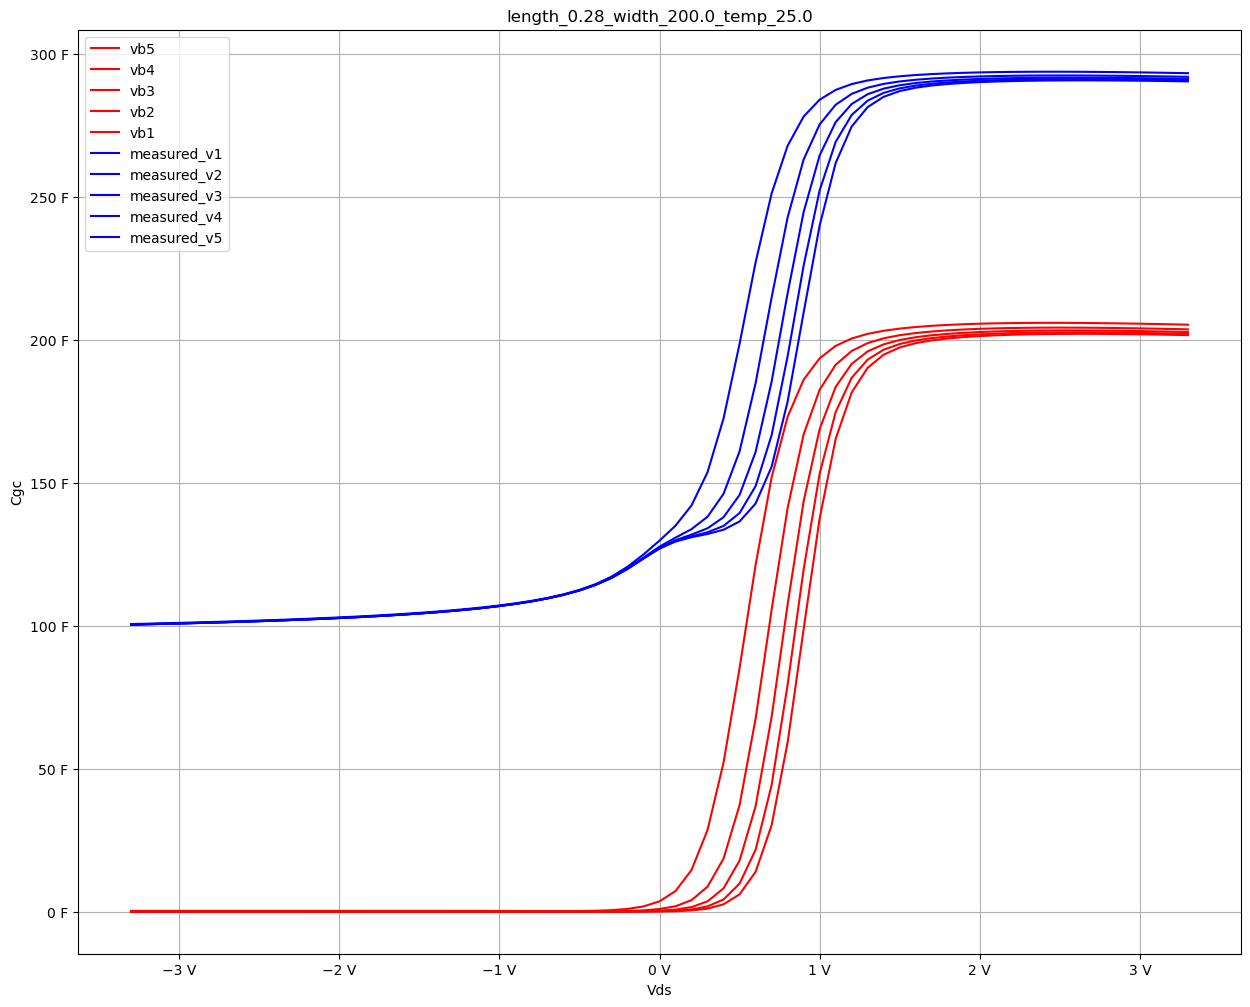

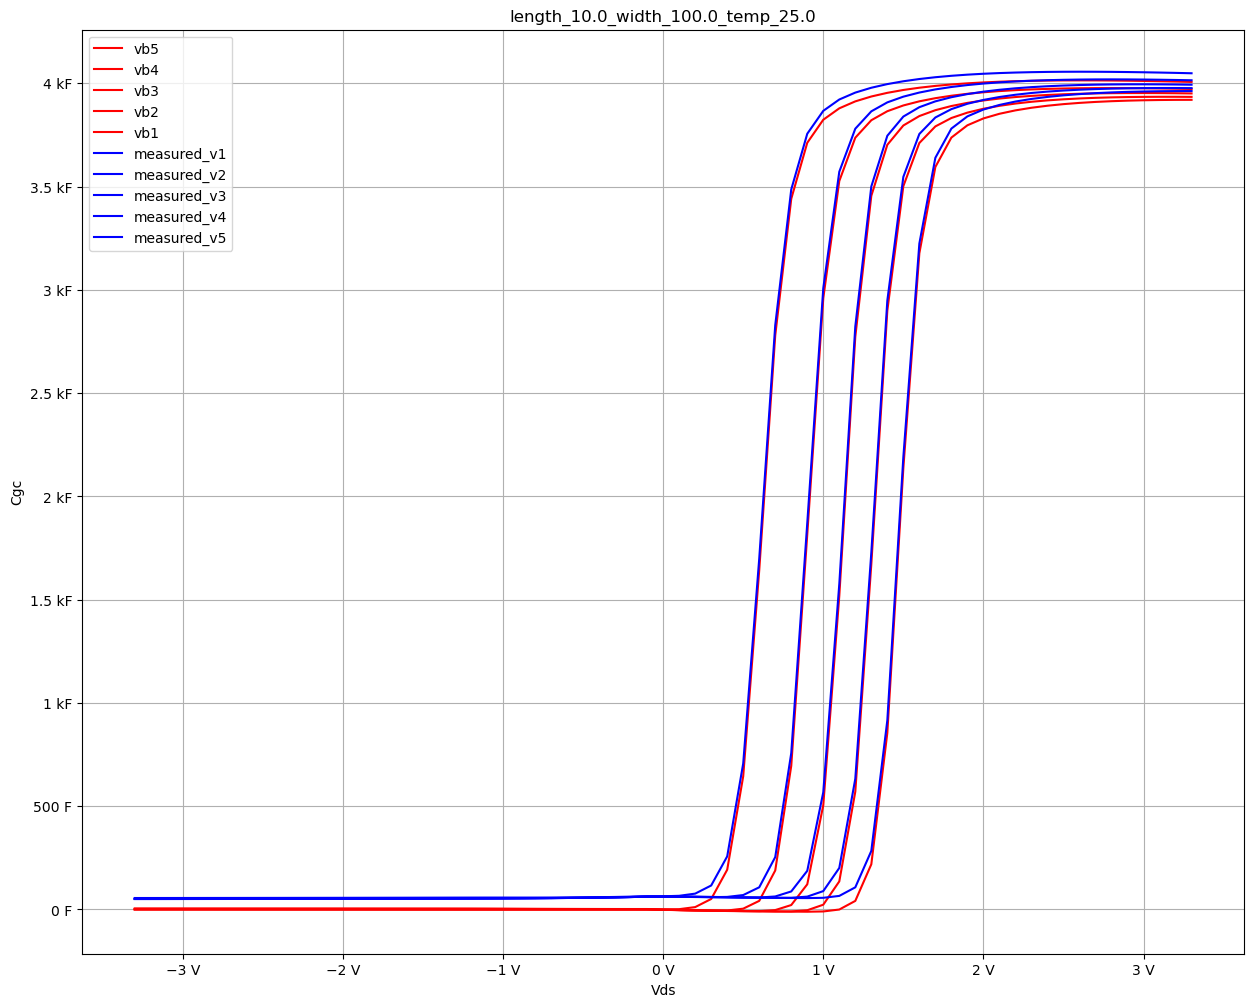

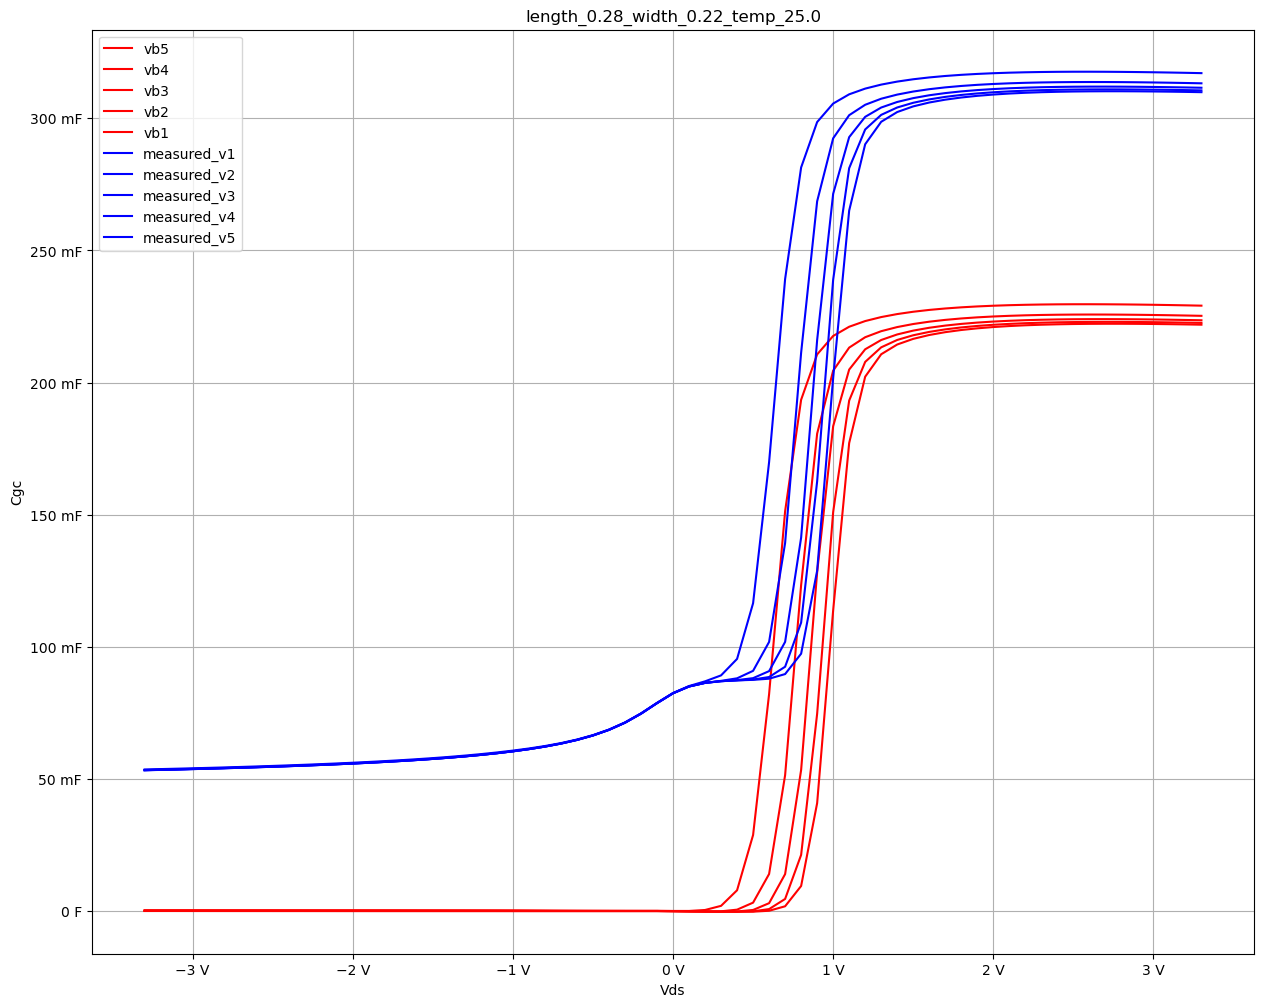

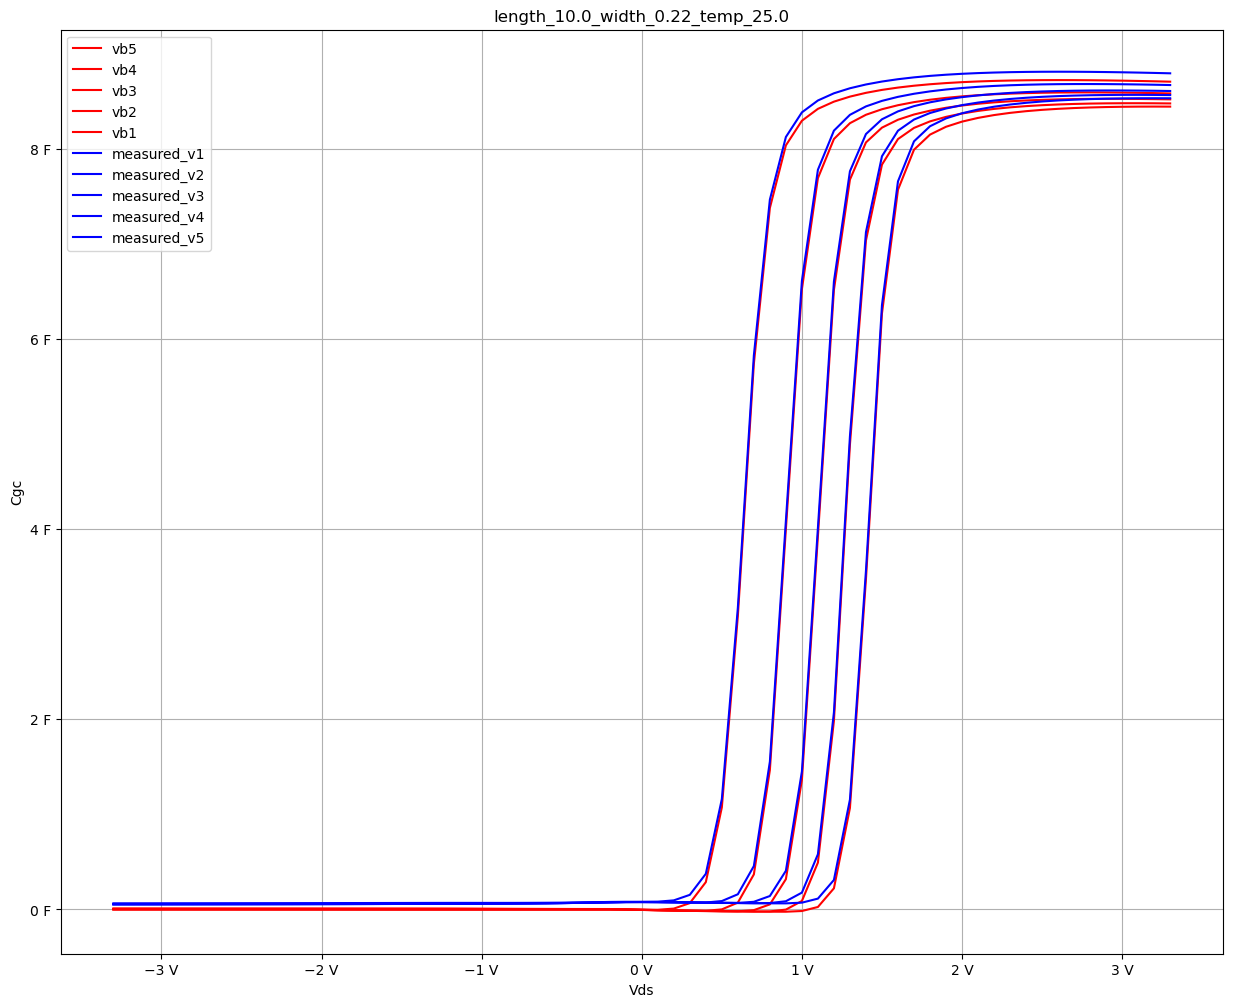

In [31]:
import os
import pandas as pd
import glob
from matplotlib import pyplot as plt
from matplotlib.ticker import EngFormatter


def draw(measured,sim_path,cap):
    """draw func draw measured data vs simulated data

    Args:
        measured (list[str]): measured files paths
        simulated (list[str]): simulated files paths
    """    
    print("measured is blue")
    print("simulated is red")
    df1 = pd.read_csv(measured)
    ROWS=int(len(df1)/4)
    for i in range(int(len(df1)/ROWS)):
        df=pd.DataFrame()  
        read_dev_name = "length_"+str(df1["length"].iloc[i*ROWS])+"_width_" +\
        str(df1["width"].iloc[i*ROWS]) + "_temp_" +str(df1["temp"].iloc[i*ROWS])
        n_col=int((len(df1.columns ) -6 )/3)
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[1:n_col+1]]=df1[df1.columns[1:n_col+1]][i*ROWS:(i+1)*ROWS]
        ax = df.plot(x=df.columns[0], y=df.columns[1:n_col+1], color="r", figsize=(15,12))
        volt_formatter = EngFormatter(unit='V')
        amp_formatter = EngFormatter(unit='F')
        ax.xaxis.set_major_formatter(volt_formatter)
        ax.yaxis.set_major_formatter(amp_formatter)
        df[0]=df1[df1.columns[0]][i*ROWS:(i+1)*ROWS]
        df[df1.columns[n_col+1:2*n_col+1]]=df1[df1.columns[n_col+1:2*n_col+1]][i*ROWS:(i+1)*ROWS]
        df.plot(ax=ax, x=df.columns[0], y=df.columns[n_col+1:2*n_col+1], color="b")
        plt.grid()
        plt.xlabel('Vds')
        plt.ylabel(f'Cg{cap}')
        plt.title(read_dev_name)        
    plt.show()

device =  [
        "nfet_03v3",
        "pfet_03v3",
        "nfet_06v0",
        "pfet_06v0",
        "nfet_06v0_nvt"
    ]

cap=["c","d","s"]
dev=0
i=0
measured = (f"mos_cv_regr/{device[dev]}/error_analysis_Cg{cap[i]}.csv")
sim_path = glob.glob(f"mos_cv_regr/{device[dev]}/{device[dev]}_netlists_Cg{cap[i]}/*.csv")
draw(measured,sim_path,cap[i])
